# **0 - Setup** 🫙

##**0.1** - install

##**0.2** - import

In [96]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import sklearn

import math

import torch
import torch.nn as nn

from tqdm.auto import tqdm

##**0.3** - utils

In [97]:
# clean the working directory
!rm -rf sample_data

# **`1 - Data`**

## 1.1 - load data

In [98]:
# upload the dataset
!curl -o dataset.csv https://raw.githubusercontent.com/danmonuni/unsuplearn_fp/refs/heads/main/data/dataset.csv

# check its csv formatting
with open('dataset.csv', 'r') as f:
        print(f.readline())
        print(f.readline())
        print(f.readline())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  645k  100  645k    0     0   656k      0 --:--:-- --:--:-- --:--:--  656k
Row;Dim_0;Dim_1=0;Dim_2=0;Dim_3=0;Dim_4=0;Dim_5=0;Dim_6=0;Dim_7=0;Dim_8=0;Dim_9=0;Dim_10=0;Dim_11=0;Dim_12=0;Dim_13=0;Dim_14=0;Dim_15=0;Dim_16;Dim_17;Dim_18;Dim_19;Dim_20;;

0;0,750000;1;0;1;1;1;1;1;0;1;1;1;1;1;1;1;0,001132;0,080780;0,197324;0,300926;0,225000;;

1;0,239583;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0,000472;0,164345;0,235786;0,537037;0,165625;;



In [99]:
# bash scritp to change the formatting of the csv file
!sed -i 's/;;//' dataset.csv
!sed -i 's/,/./g' dataset.csv
!sed -i 's/;/,/g' dataset.csv

# check conversion
with open('dataset.csv', 'r') as f:
        print(f.readline())
        print(f.readline())
        print(f.readline())

Row,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,Dim_10=0,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20

0,0.750000,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000

1,0.239583,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625



In [162]:
# load the dataset with pandas
df = pd.read_csv('dataset.csv', index_col = 0)

In [161]:
# check its types and the number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 0 to 7199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cat_0_dummy_0  7200 non-null   int64  
 1   cat_0_dummy_1  7200 non-null   int64  
 2   bin_0          7200 non-null   int64  
 3   bin_1          7200 non-null   int64  
 4   bin_2          7200 non-null   int64  
 5   bin_3          7200 non-null   int64  
 6   bin_4          7200 non-null   int64  
 7   bin_5          7200 non-null   int64  
 8   bin_6          7200 non-null   int64  
 9   bin_7          7200 non-null   int64  
 10  bin_8          7200 non-null   int64  
 11  bin_9          7200 non-null   int64  
 12  bin_10         7200 non-null   int64  
 13  bin_11         7200 non-null   int64  
 14  bin_12         7200 non-null   int64  
 15  con_0          7200 non-null   float64
 16  con_1          7200 non-null   float64
 17  con_2          7200 non-null   float64
 18  con_3        

In [102]:
# print some statistics
df.describe()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.531790,0.695694,0.869444,0.984583,0.987222,0.961667,0.989167,0.985972,0.983194,0.934444,...,0.987361,0.991806,0.974444,0.999861,0.951111,0.009172,0.108506,0.179649,0.374250,0.173773
std,0.197156,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.111718,0.090158,0.157816,0.011785,0.215651,0.043357,0.042001,0.060148,0.088354,0.056402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001340,0.091922,0.145485,0.324074,0.145312
50%,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003208,0.109192,0.175585,0.370370,0.170313
75%,0.687500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.005094,0.119777,0.205686,0.402778,0.195313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.2 - data exploration

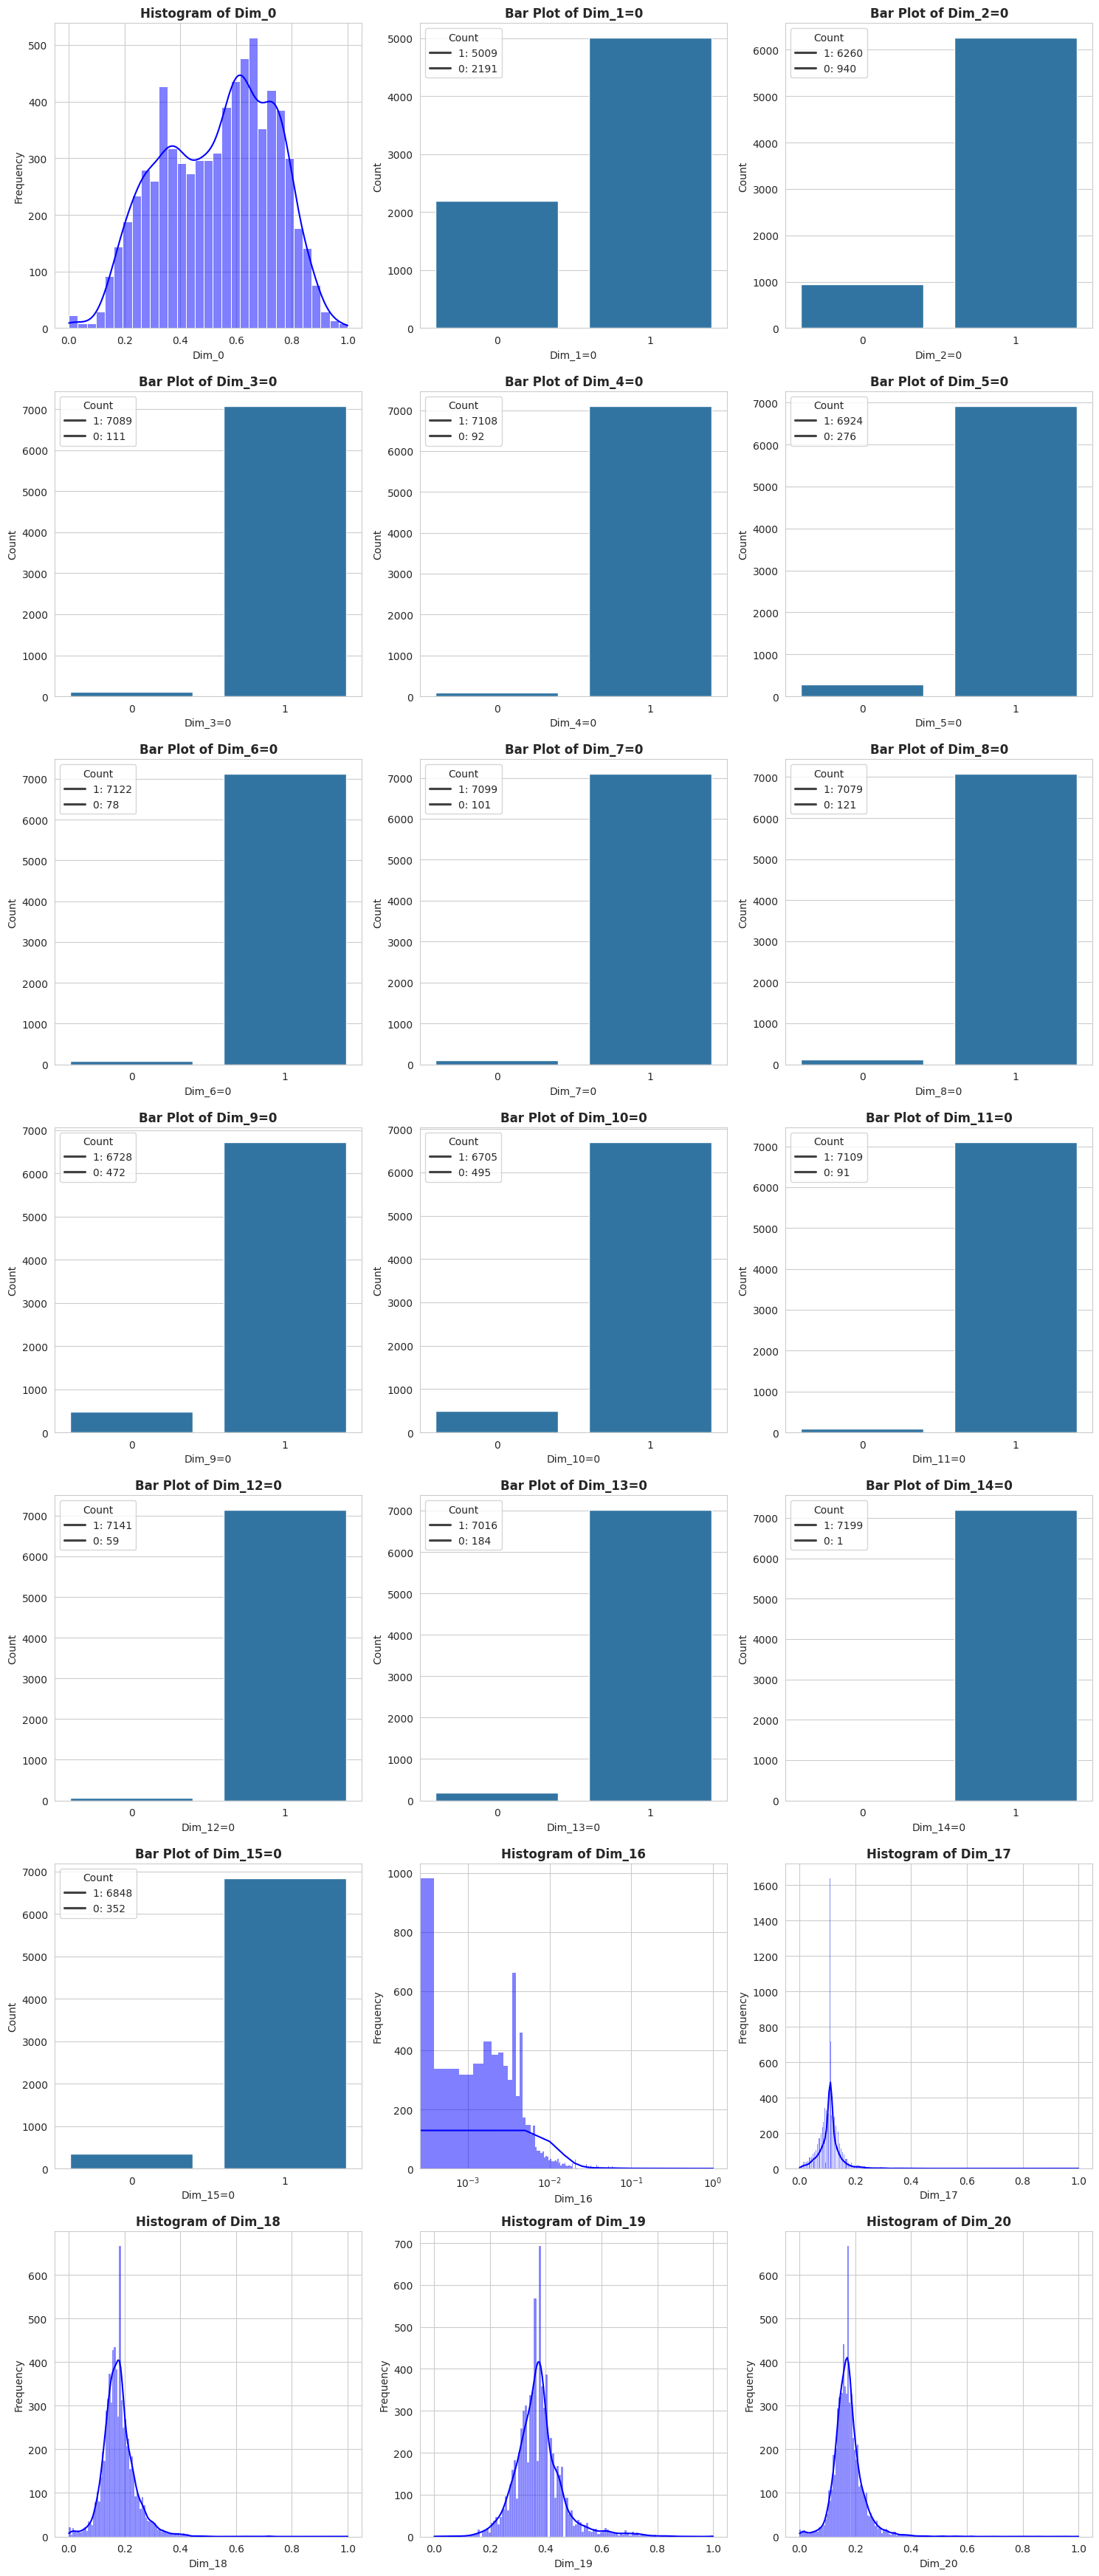

In [164]:
# plot every dataset column as an histogram/bar plot

fig, axes = plt.subplots(7, 3, figsize=(15, 35))

axes = axes.flatten()

binary_mask = df.nunique() <= 2

for i, col in enumerate(df.columns):

    if binary_mask[col]:
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].legend(title='Count', labels=[f'{index}: {count}' for index, count in zip(value_counts.index, value_counts.values)])
        axes[i].set_title(f'Bar Plot of {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    else:
        sns.histplot(df[col], ax=axes[i], kde=True, color='blue')
        axes[i].set_title(f'Histogram of {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        if i == 16:
          axes[i].set_xscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

from a first exploration of the data I see that almost all binary variables have highly unbalanced distributions. For this reason I will treat every binary variable asymmetrically (sparse data). I will use cosine or jaccard distance(jaccard is better).

The only exception will be the first binary variable (dim_1), which has counts in the same order of magnitude. I will use simple matching distance.

All the continuous variables are min-max normalised in the 0-1 range.

As for variables 17 to 20, they seem reasonably normal, with spikes in the center, this suggests me that there should have been some sort of mean/median data imputation procedure.

As for variable 16, it has a very bizzarre distribution. is resembles an exponential distribution. But also features a peak in the middle.


## 1.3 - preprocessing


In [104]:
print(df.columns)

Index(['Dim_0', 'Dim_1=0', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0',
       'Dim_6=0', 'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0',
       'Dim_12=0', 'Dim_13=0', 'Dim_14=0', 'Dim_15=0', 'Dim_16', 'Dim_17',
       'Dim_18', 'Dim_19', 'Dim_20'],
      dtype='object')


In [105]:
#reorder the dataset columns to put all binary variables in front of continuous ones

new_order = ['Dim_1=0', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0','Dim_6=0', 'Dim_7=0',
            'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0', 'Dim_12=0', 'Dim_13=0', 'Dim_14=0',
            'Dim_15=0', 'Dim_0', 'Dim_16', 'Dim_17','Dim_18', 'Dim_19', 'Dim_20']

df = df[new_order]

del new_order

In [106]:
# swap the values of the binary variables I am going to treat as sparse.
sparse_columns = ['Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0',
       'Dim_6=0', 'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0',
       'Dim_12=0', 'Dim_13=0', 'Dim_14=0', 'Dim_15=0']

df[sparse_columns] = 1 - df[sparse_columns]

del sparse_columns

one-hot encode variable Dim_1=0 as I consider it to be categorical but I want to handle it with sparse methods. For example I wanted to use smc on it while jaccard on others, with this encoding jaccard will be equivalent to smc.

In [107]:
# get a one hot encoding of the first binary variable to treat it as categorical

one_hot = pd.get_dummies(df['Dim_1=0'], prefix='Dim_1=0', dtype = int)

df = pd.concat([one_hot, df], axis=1)

df = df.drop(columns=['Dim_1=0'])

print(df.columns)

del one_hot



Index(['Dim_1=0_0', 'Dim_1=0_1', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0',
       'Dim_6=0', 'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0',
       'Dim_12=0', 'Dim_13=0', 'Dim_14=0', 'Dim_15=0', 'Dim_0', 'Dim_16',
       'Dim_17', 'Dim_18', 'Dim_19', 'Dim_20'],
      dtype='object')


then, I will drop variable 14 as it characterises only a single data point, I will save the datapoint for manual inspection later

In [108]:
# save the datapoint where dimension 14 is 1 and drop column 14
dim_14_instance = df[df['Dim_14=0'] == 1]
dim_14_instance.to_csv('dim_14_instance.csv', index=False)

df = df.drop(columns=['Dim_14=0'])

print(df.columns)

del dim_14_instance

Index(['Dim_1=0_0', 'Dim_1=0_1', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0',
       'Dim_6=0', 'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0',
       'Dim_12=0', 'Dim_13=0', 'Dim_15=0', 'Dim_0', 'Dim_16', 'Dim_17',
       'Dim_18', 'Dim_19', 'Dim_20'],
      dtype='object')


In [109]:
# rename columns for readibility
new_column_names = {
    'Dim_1=0_0': 'cat_0_dummy_0',
    'Dim_1=0_1': 'cat_0_dummy_1',
    'Dim_2=0': 'bin_0',
    'Dim_3=0': 'bin_1',
    'Dim_4=0': 'bin_2',
    'Dim_5=0': 'bin_3',
    'Dim_6=0': 'bin_4',
    'Dim_7=0': 'bin_5',
    'Dim_8=0': 'bin_6',
    'Dim_9=0': 'bin_7',
    'Dim_10=0': 'bin_8',
    'Dim_11=0': 'bin_9',
    'Dim_12=0': 'bin_10',
    'Dim_13=0': 'bin_11',
    'Dim_15=0': 'bin_12',
    'Dim_0': 'con_0',
    'Dim_16': 'con_1',
    'Dim_17': 'con_2',
    'Dim_18': 'con_3',
    'Dim_19': 'con_4',
    'Dim_20': 'con_5'
}


df = df.rename(columns=new_column_names)

print(df.columns)

del new_column_names

Index(['cat_0_dummy_0', 'cat_0_dummy_1', 'bin_0', 'bin_1', 'bin_2', 'bin_3',
       'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9', 'bin_10',
       'bin_11', 'bin_12', 'con_0', 'con_1', 'con_2', 'con_3', 'con_4',
       'con_5'],
      dtype='object')


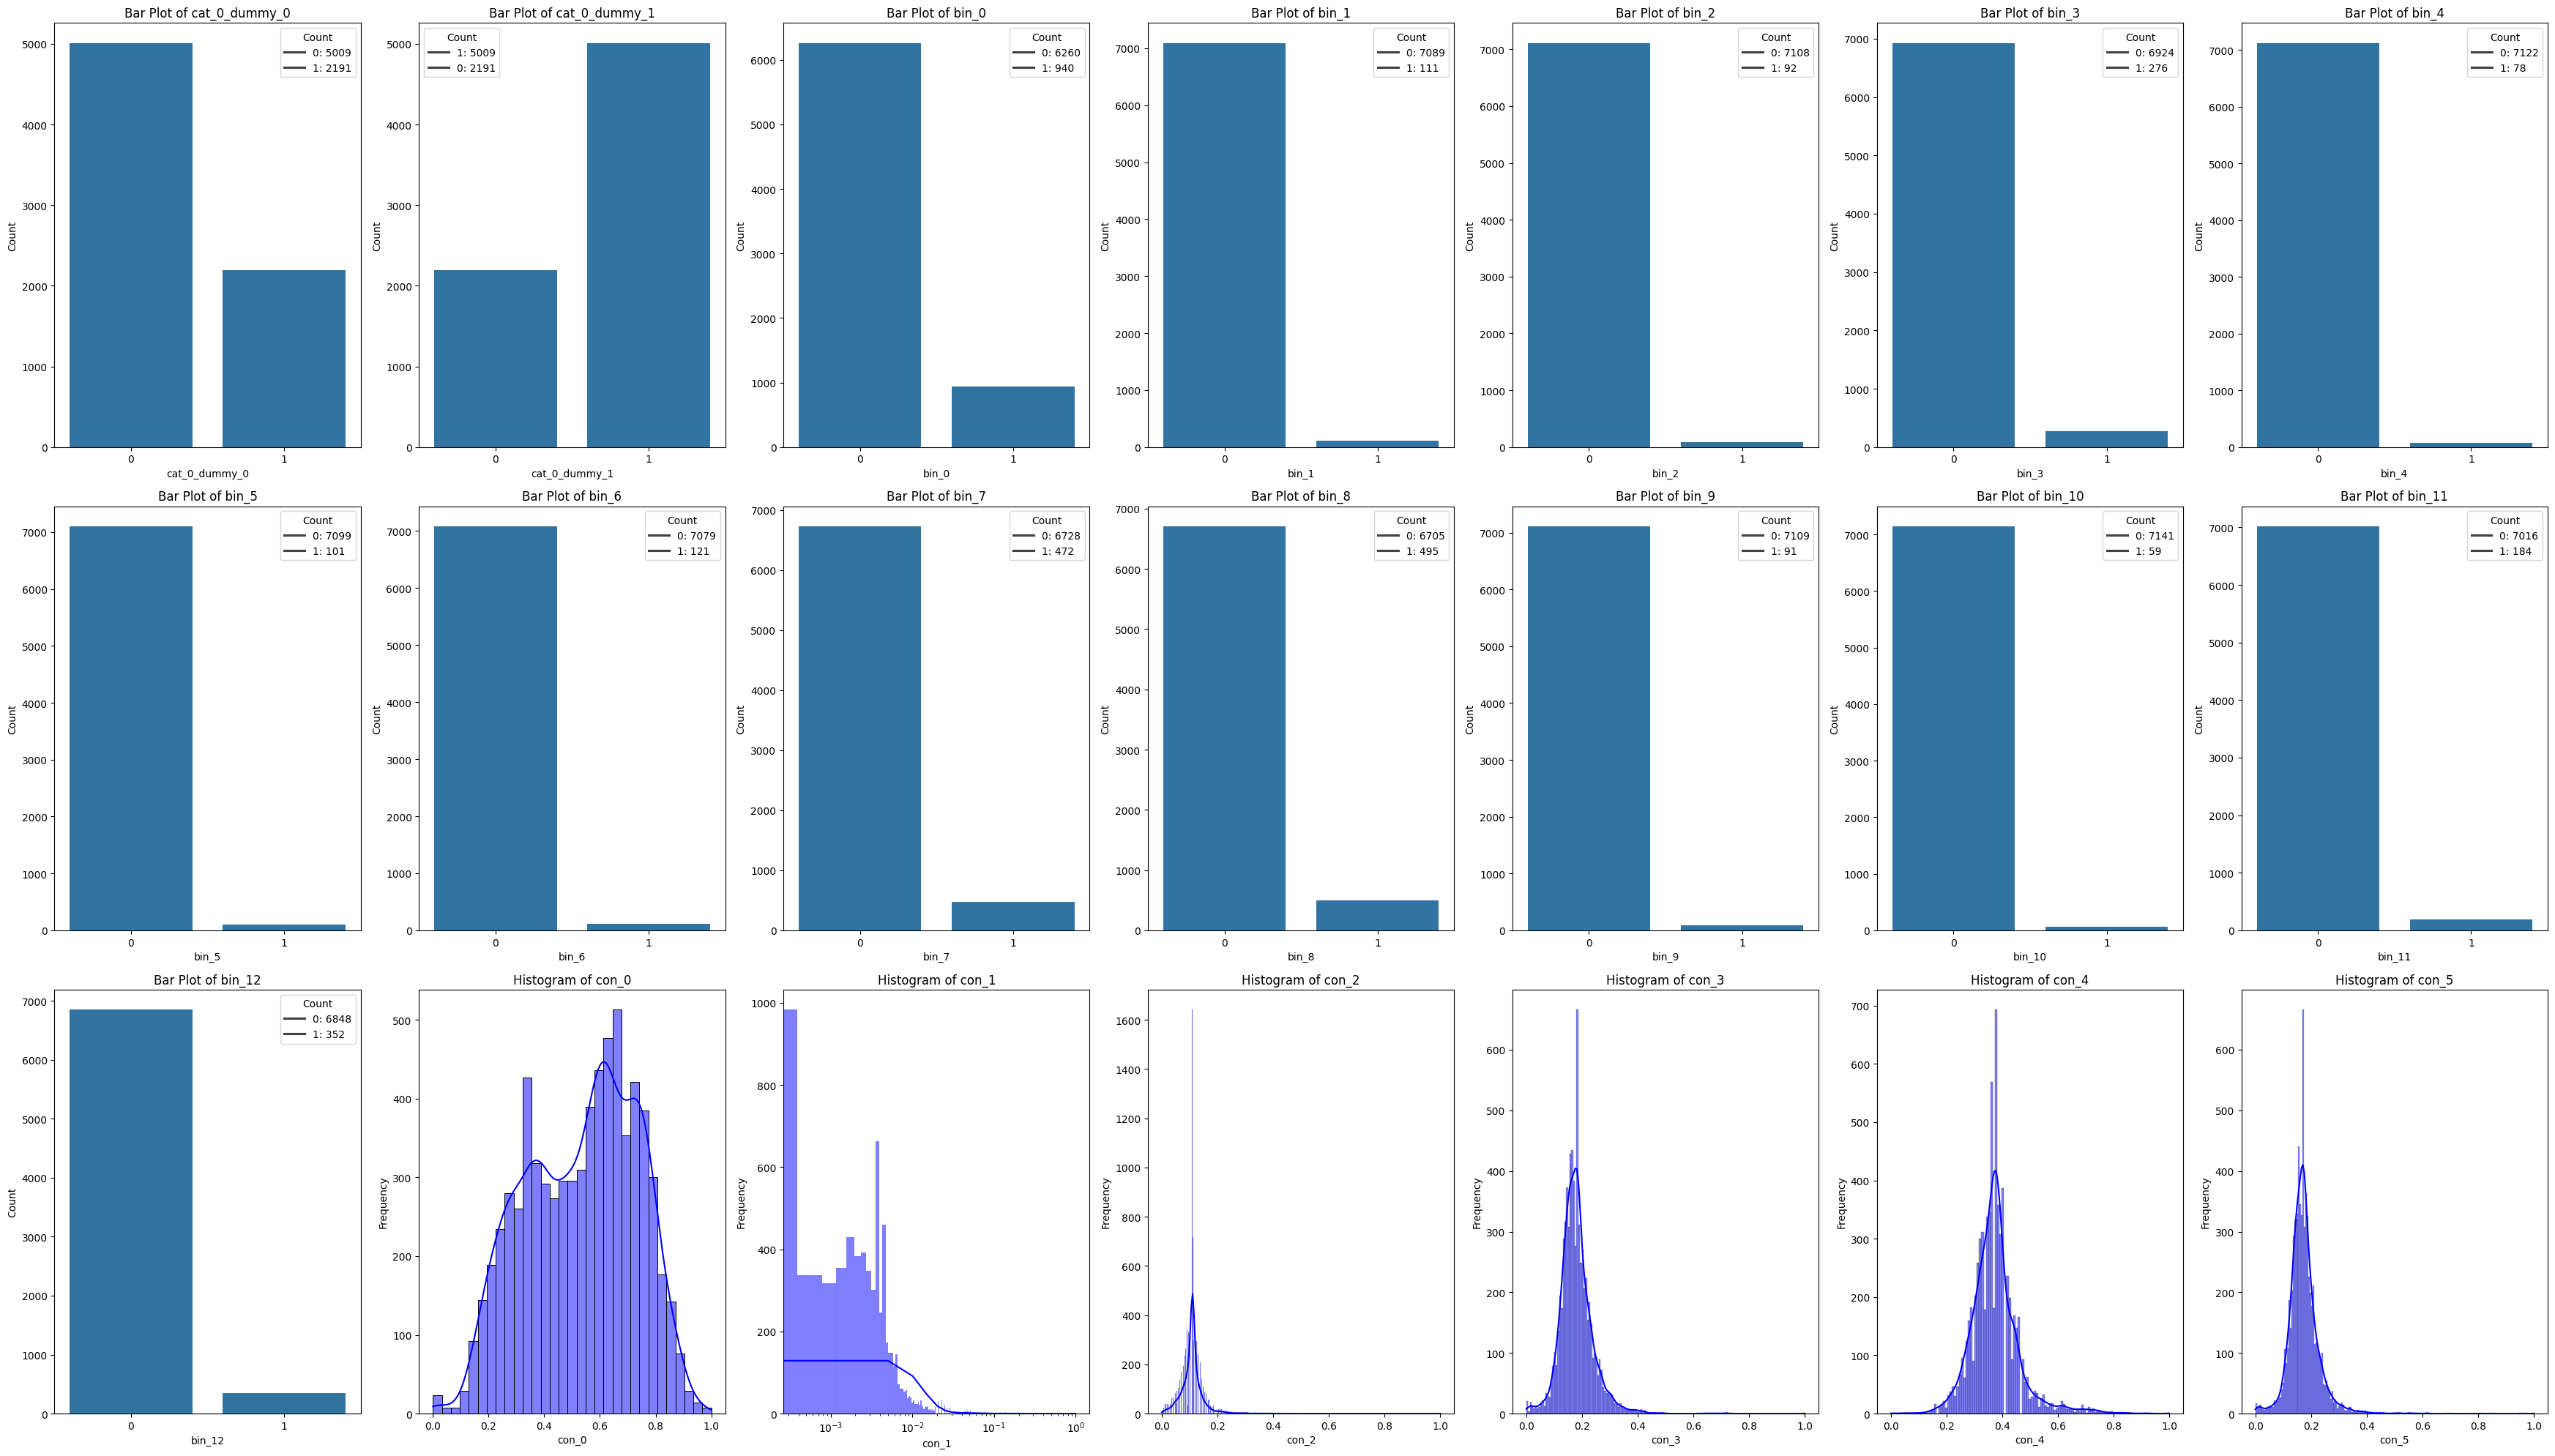

In [110]:
# plot again every column of the dataset as an histogram/bar chart

fig, axes = plt.subplots(3, 7, figsize=(35, 20))

axes = axes.flatten()

binary_mask = df.nunique() <= 2

for i, col in enumerate(df.columns):

    if binary_mask[col]:
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].legend(title='Count', labels=[f'{index}: {count}' for index, count in zip(value_counts.index, value_counts.values)])
        axes[i].set_title(f'Bar Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    else:
        sns.histplot(df[col], ax=axes[i], kde=True, color='blue')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        if i == 16:
          axes[i].set_xscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

# **2 - Computing Distance Between Data Points**

To compute the distance between data point of mixed type I found in the literature the Grower distance. However to account for sparse variables I will take it as an ispiration to obtain a custom distance. The custom distance will be obtained as a weighted average between a jaccard distance on the binary part and a manhattan (or euclidean distance) on the continuos variables. I will scale the continuous distances to lay between 0 and 1, since they were already scaled, I just need to correct by the dimensionality (or its square root).

jaccard + euclidean(scale by sqrt(d)) / manhattan (scale by d)

In [153]:
# the following function will implement the custom distance described above
# it returns the distances between pair of points in a single dataset X

def composite_distance_matrix_single(X,  binary_columns = range(0,14), continuous_columns = range(15,21), continuous_metric='cityblock', squareform = True):

    n_binary = len(binary_columns) -1 # -1 to correct the dummy double counting
    n_continuous = len(continuous_columns)

    scaling = n_continuous

    if continuous_metric == 'euclidean':
        scaling = math.sqrt(scaling)


    bin_dist =  scipy.spatial.distance.pdist(X[:,binary_columns],  metric='jaccard')
    if squareform:
        bin_dist =  scipy.spatial.distance.squareform(bin_dist)

    con_dist =  scipy.spatial.distance.pdist(X[:,continuous_columns],  metric = continuous_metric) / scaling
    if squareform:
        con_dist =  scipy.spatial.distance.squareform(con_dist)

    comp_dist = (n_binary * bin_dist + n_continuous * con_dist) / (n_binary + n_continuous)

    return comp_dist

In [115]:
# the following function will implement the custom distance described above
# it takes a two datasets and returns a distance matrix with between every pair of points from the two datasets
def composite_distance_matrix_double(X, Y, binary_columns = range(0,14), continuous_columns = range(15,21), continuous_metric='cityblock'):

    n_binary = len(binary_columns) -1 # -1 to correct the dummy double counting
    n_continuous = len(continuous_columns)

    scaling = n_continuous

    if continuous_metric == 'euclidean':
        scaling = math.sqrt(scaling)


    bin_dist =  scipy.spatial.distance.cdist(X[:,binary_columns], Y[:,binary_columns], metric='jaccard')

    con_dist =  scipy.spatial.distance.cdist(X[:,continuous_columns], Y[:,continuous_columns], metric = continuous_metric) / scaling

    comp_dist = (n_binary * bin_dist + n_continuous * con_dist) / (n_binary + n_continuous)

    return comp_dist


# **3 - Clustering**

To try to understand the data better, and to prepare for some anomaly detection algorithms in the following section I will try understand if there are any natural clusters in the dataset.

## **PCA** ✅



<Axes: xlabel='PC1', ylabel='PC2'>

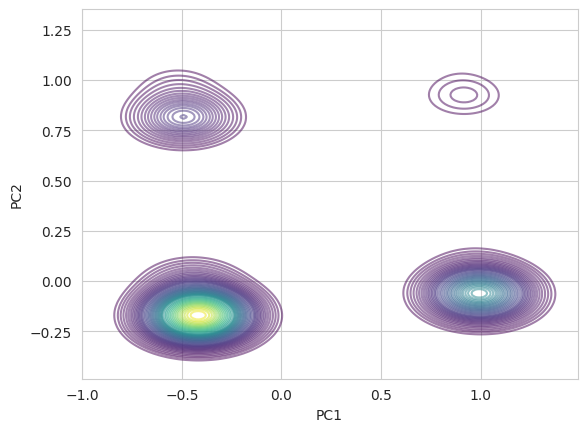

In [137]:
X = df.to_numpy()

pca = sklearn.decomposition.PCA(n_components=2)
X_proj = pca.fit_transform(X)

X_proj_df = pd.DataFrame(X_proj, columns=['PC1', 'PC2'])

sns.set_style("whitegrid")
sns.kdeplot(data=X_proj_df, x='PC1', y='PC2', fill=False, cmap='viridis', alpha=0.5, levels=50)
#sns.scatterplot(data = X_proj_df, x = 'PC1', y = 'PC2', s = 100)


## **DBSCAN**

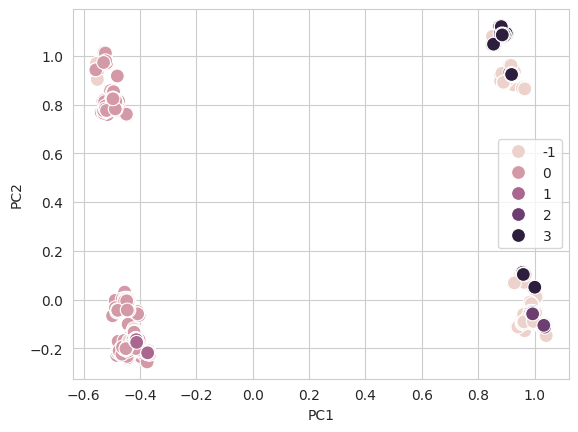

[0 1 1 ... 1 2 1]


In [150]:
distance_matrix = composite_distance_matrix_single(df.to_numpy())

dbscan = sklearn.cluster.DBSCAN(metric='precomputed', eps=0.25, min_samples=150)
labels = dbscan.fit_predict(distance_matrix)

sns.scatterplot(data = X_proj_df, x = 'PC1', y = 'PC2', hue = labels, s = 100)
plt.show()

## **Hierarchical**

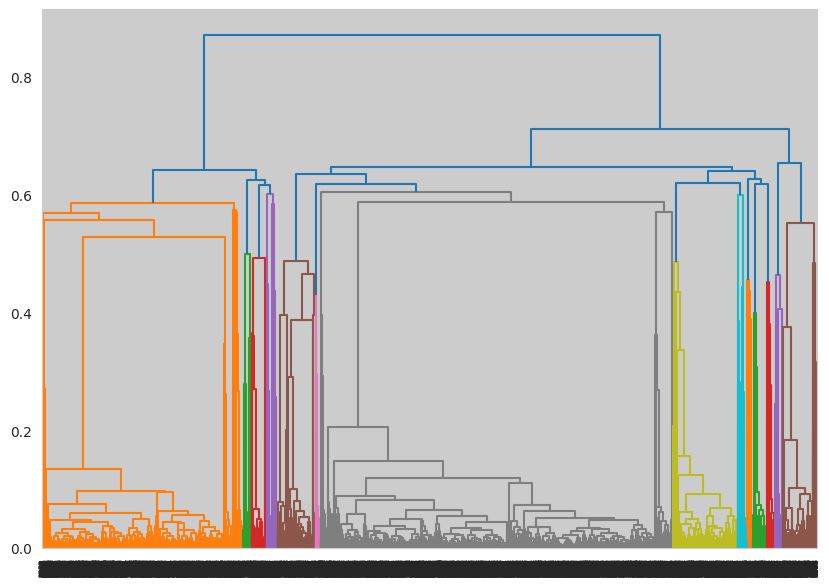

In [157]:
distance_matrix = composite_distance_matrix_single(df.to_numpy(), squareform = False)


# Plot the dendrogram
plt.figure(figsize=(10, 7), facecolor='white')
linkage = scipy.cluster.hierarchy.linkage(distance_matrix, method='complete')
scipy.cluster.hierarchy.dendrogram(linkage, no_plot=0)


plt.show()




# **4 - Anomaly Detection**

## **Reconstruction - PCA** ✅



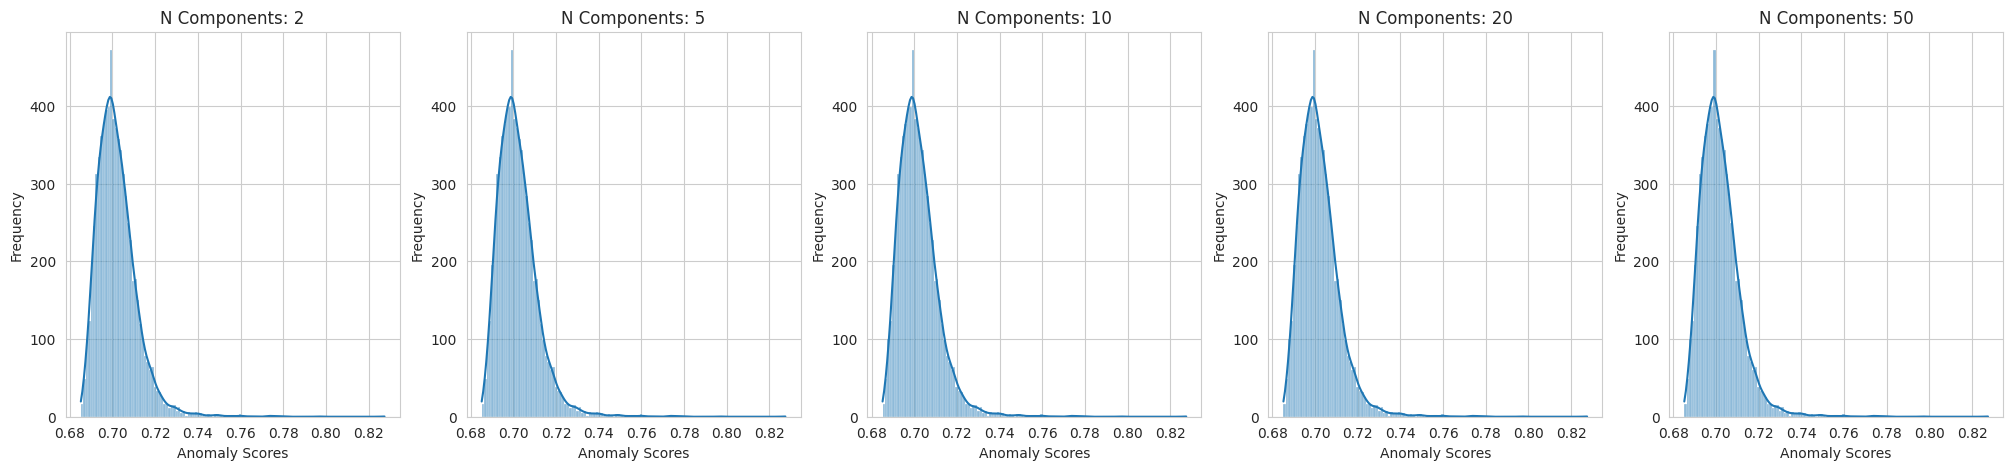

In [139]:
X = df.to_numpy()

n_components = [2,5,10,20,50]

fig, axes = plt.subplots(1, len(n_components), figsize=(5*len(n_components), 5))

for i, n in enumerate(n_components):

    pca = sklearn.decomposition.PCA(n_components=2)
    X_proj = pca.fit_transform(X)

    X_reconstructed = pca.inverse_transform(X_proj)
    reconstruction_error = composite_distance_matrix_double(X,X_reconstructed).diagonal()

    sns.histplot(reconstruction_error, kde=True, ax=axes[i])
    axes[i].set_title(f"N Components: {n}")
    axes[i].set_xlabel("Anomaly Scores")
    axes[i].set_ylabel("Frequency")

plt.show()

## **One-Class SVM** ✅

In [93]:
def custom_kernel(X, Y):

    distance_matrix = composite_distance_matrix_double(X, Y)

    return np.exp(-distance_matrix)

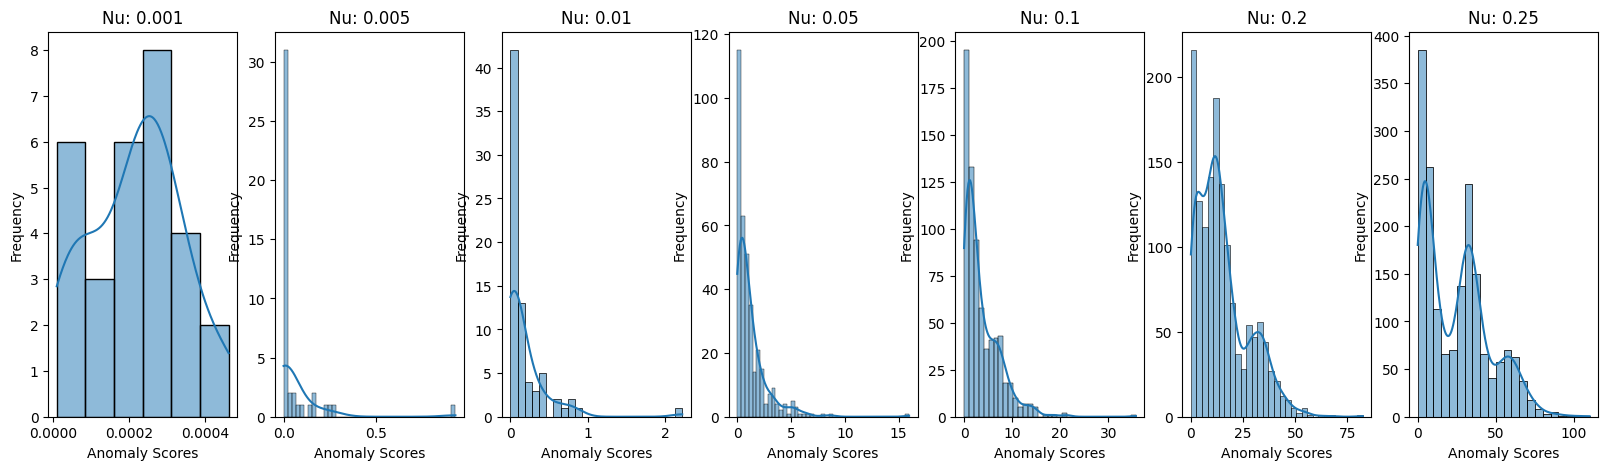

In [94]:
nus = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]

fig, axes = plt.subplots(1, len(nus), figsize=(5*len(nus), 5))



for i, nu in enumerate(nus):

    ocsvm = sklearn.svm.OneClassSVM(nu=nu, kernel=custom_kernel, gamma="scale")

    ocsvm.fit(df.to_numpy())

    anomaly_scores =  - ocsvm.decision_function(df.to_numpy())

    sns.histplot(anomaly_scores[anomaly_scores > 0], kde=True, ax=axes[i])
    axes[i].set_title(f"Nu: {nu}")
    axes[i].set_xlabel("Anomaly Scores")
    axes[i].set_ylabel("Frequency")

plt.show()




## **Recostruction Based - Autoencoders** ✅

In [38]:
#define the autoencoder class

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, int(hidden_dim+input_dim/2)),
            nn.ReLU(),
            nn.Linear(int(hidden_dim+input_dim/2), hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, int(hidden_dim+input_dim/2)),
            nn.ReLU(),
            nn.Linear(int(hidden_dim+input_dim/2), input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    # the anomaly score function returns the reconstruction loss for the autoencoder
    def anomaly_scores(self, data_tensor):
        self.eval()
        with torch.no_grad():
            reconstructions = self.forward(data_tensor)
            anomaly_scores = torch.mean((reconstructions - data_tensor) ** 2, dim=1)
            return anomaly_scores


  0%|          | 0/20000 [00:00<?, ?it/s]

torch.Size([7200])


  0%|          | 0/20000 [00:00<?, ?it/s]

torch.Size([7200])


  0%|          | 0/20000 [00:00<?, ?it/s]

torch.Size([7200])


  0%|          | 0/20000 [00:00<?, ?it/s]

torch.Size([7200])


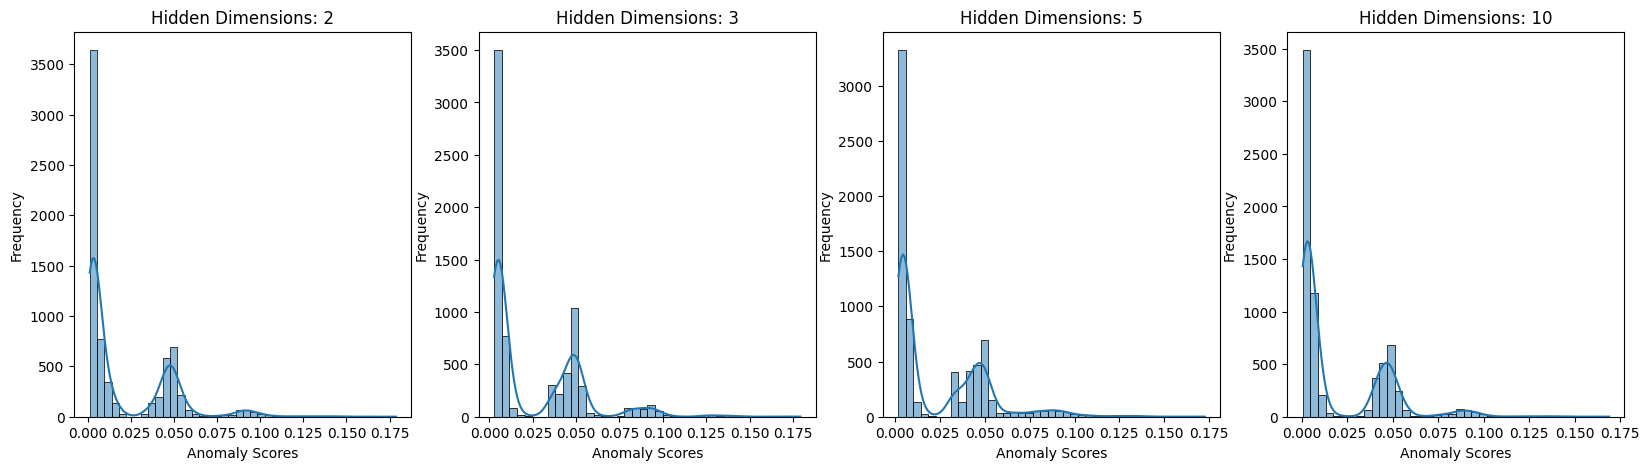

In [40]:
hidden_dims = [2, 3, 5, 10]
epochs = 20000

fig, axes = plt.subplots(1, len(hidden_dims), figsize=(5*len(hidden_dims), 5))

for i, hidden_dim in enumerate(hidden_dims):

    model = Autoencoder(input_dim=21, hidden_dim=hidden_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    data_tensor = torch.tensor(df.to_numpy(), dtype = torch.float32)
    criterion = nn.MSELoss()

    early_stop_buffer = np.ones(5)

    # Training loop
    for epoch in tqdm(range(epochs)):

        optimizer.zero_grad()

        inputs = data_tensor
        outputs = model(data_tensor)

        loss = criterion(outputs, inputs)
        loss.backward()

        optimizer.step()

        early_stop_buffer = np.append(early_stop_buffer[1:], loss.item())

        if early_stop_buffer.max() - early_stop_buffer.min() < 0.00001:
            break



    anomaly_scores = model.anomaly_scores(data_tensor)

    sns.histplot(anomaly_scores.numpy(), kde=True, ax=axes[i])
    axes[i].set_title(f"Hidden Dimensions: {hidden_dim}")
    axes[i].set_xlabel("Anomaly Scores")
    axes[i].set_ylabel("Frequency")

plt.show()

## **Isolation Forest** ✅

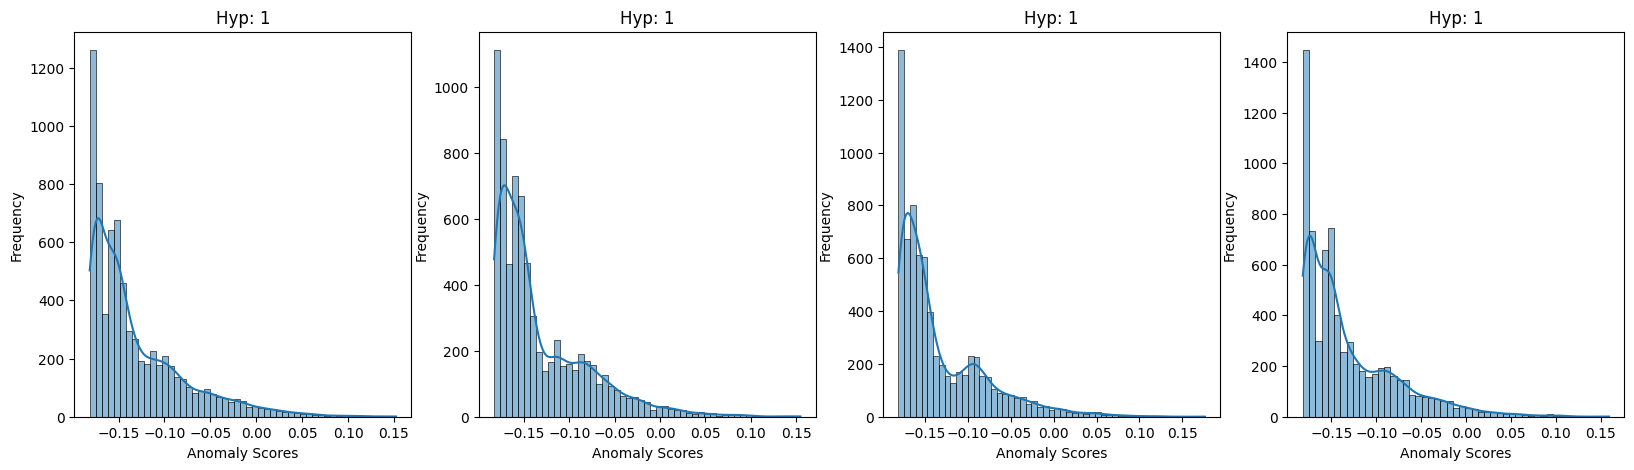

In [124]:
hyperparams = [1,1,1,1]

isolation_forest = sklearn.ensemble.IsolationForest(n_estimators=100, max_samples = 3600)

fig, axes = plt.subplots(1, len(hyperparams), figsize=(5*len(hyperparams), 5))

for i, hyp in enumerate(hyperparams):

    isolation_forest = sklearn.ensemble.IsolationForest(n_estimators=100, max_samples = 3600)

    isolation_forest.fit(df.to_numpy())

    anomaly_scores =  - isolation_forest.decision_function(df.to_numpy())

    sns.histplot(anomaly_scores, kde=True, ax=axes[i])
    axes[i].set_title(f"Hyp: {hyp}")
    axes[i].set_xlabel("Anomaly Scores")
    axes[i].set_ylabel("Frequency")

plt.show()


## **Proximity model free**

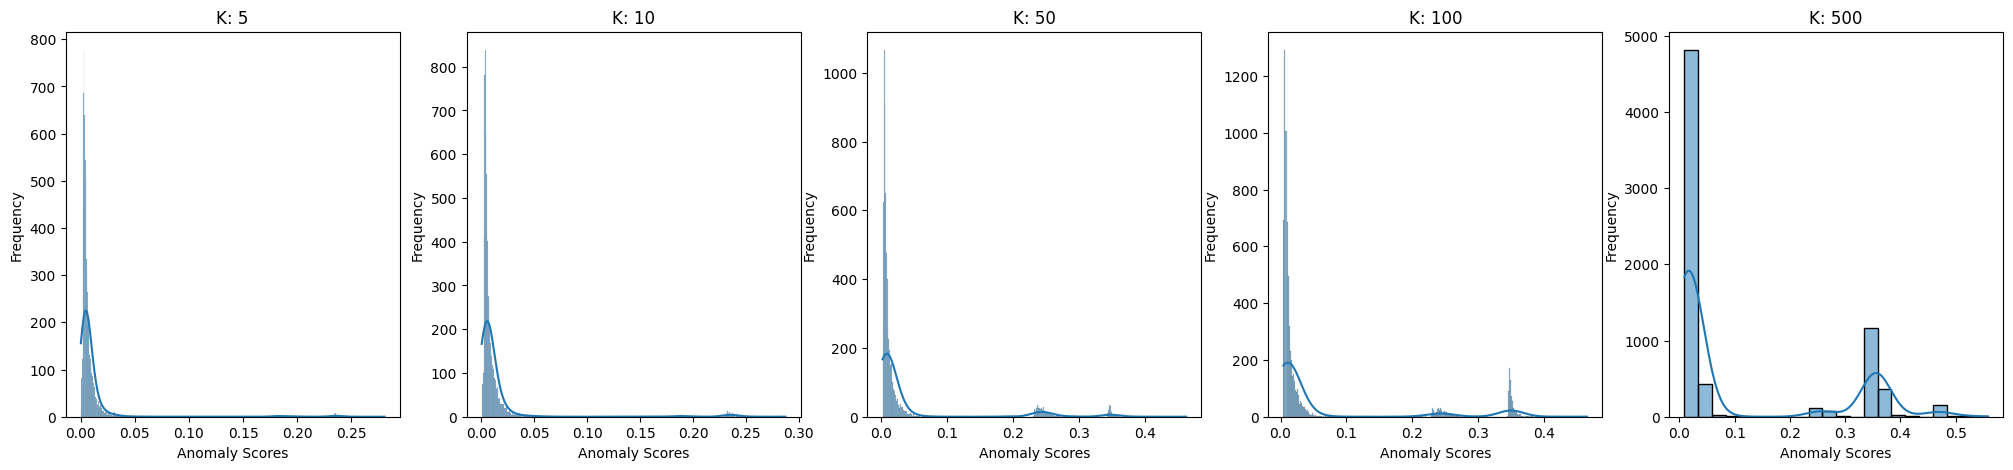

In [120]:
ks = [5, 10, 50, 100, 500]

distance_matrix = composite_distance_matrix_single(df.to_numpy())

fig, axes = plt.subplots(1, len(ks), figsize=(5*len(ks), 5))


for i, k in enumerate(ks):

    ## compute d_k distances
    # initialise an array to store the kth distance for every datapoint
    d_ks = np.zeros(distance_matrix.shape[0])

    # for every row in the distance matrix, sort it and take the kth value
    # since indexing starts from 0, we need no correction to account for the diagonal element (of distance 0)
    for j in range(distance_matrix.shape[0]):
        d_ks[j] = np.sort(distance_matrix[j,:])[k]




    sns.histplot(d_ks, kde=True, ax=axes[i])
    axes[i].set_title(f"K: {k}")
    axes[i].set_xlabel("Anomaly Scores")
    axes[i].set_ylabel("Frequency")

plt.show()




## **Clustering based**




## **Statistical - Likelihood**


